<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_11/TG11_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1 - Klasifikasi SVM dengan Data Dummy Linier

## Langkah 1 - Import Library

In [ ]:
# Library untuk perhitungan numerik dan manipulasi array/matriks
import numpy as np

# Library untuk visualisasi statistik yang berbasis matplotlib
import seaborn as sns

# Library untuk membuat grafik dan plot 2D
import matplotlib.pyplot as plt

# Modul untuk analisis statistik dan fungsi distribusi probabilitas
from scipy import stats

## Langkah 2 - Membuat Data Dummy

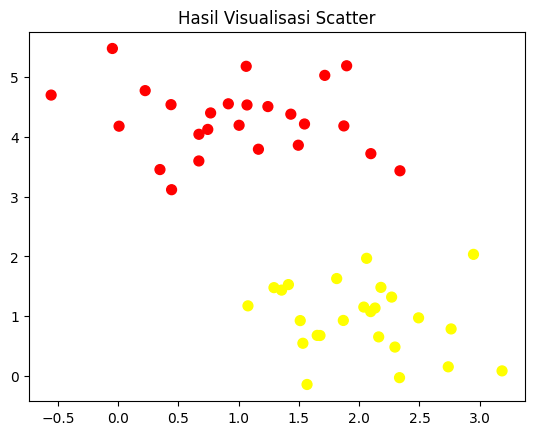

In [ ]:
# Import fungsi untuk membuat dataset sintetis berbasis cluster
from sklearn.datasets import make_blobs

# Membuat dataset sintetis dengan ,  standar deviasi cluster 0.60, dan
X, y = make_blobs(
    n_samples=50,   # 50 sampel
    centers=2,      # 2 cluster
    random_state=0, # seed random 0
    cluster_std=0.60
)

# Memberi judul pada plot
plt.title("Hasil Visualisasi Scatter")

# Membuat scatter plot, warna sesuai label y, ukuran titik 50, colormap 'autumn'
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Menampilkan plot
plt.show()

## Langkah 3 - Buat Ilustrasi Garis Pemisah

## Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

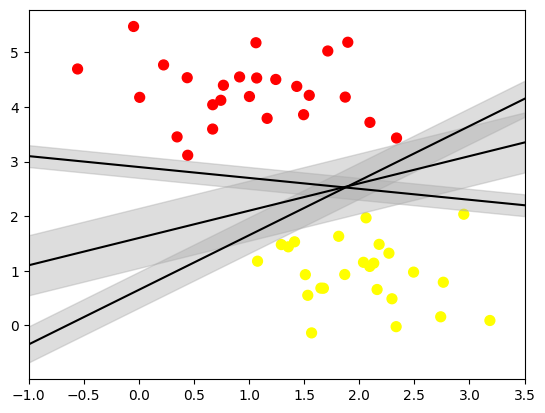

In [ ]:
# membuat array xfit untuk sumbu x dari -1 hingga 3.5
xfit = np.linspace(-1, 3.5)

# membuat sactter plot dataset, warna sesuai label y, ukuran titik 50, colormap 'autumn
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# loop untuk menggambar garis dan area bayangan untuk beberapa parameter slope, intercept, dan deviasi
for m, b, d, in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  # menghitung nilai y sesuai garis y = m*x + b
  yfit = m * xfit + b
  # menggambar garis hitam
  plt.plot(xfit, yfit, '-k')
  # mengisi area bayangan di sekitar garis dari yfit-d hingga yfit+d
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

# menentukan batas sumbu x dari -1 hingga 3.5
plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

### 1. Pelatihan terhadap model SVM

In [ ]:
from sklearn.svm import SVC     # SVC kepanjangan dari support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### 2. Visualisasi hasil fit model

In [ ]:
# fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  # mengambil batas sumbu x
  xlim = ax.get_xlim()
  # mengambil batas sumbu y
  ylim = ax.get_ylim()

  # grid untuk evaluasi model
  # membuat 30 titik antara batas x
  x = np.linspace(xlim[0], xlim[1], 30)
  # membuat 30 titik antara batas y
  y = np.linspace(ylim[0], ylim[1], 30)
  # membuat grid 2D dari titik - titik x dan y
  Y, X = np.meshgrid(y, x)
  # menggabungkan pasangan x dan y
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  # menghitung nilai keputusan SVM untuk grid
  P = model.decision_function(xy).reshape(X.shape)

  # plot batas margin
  ax.contour(X, Y, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])

  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

### 3. Hasil Plotting

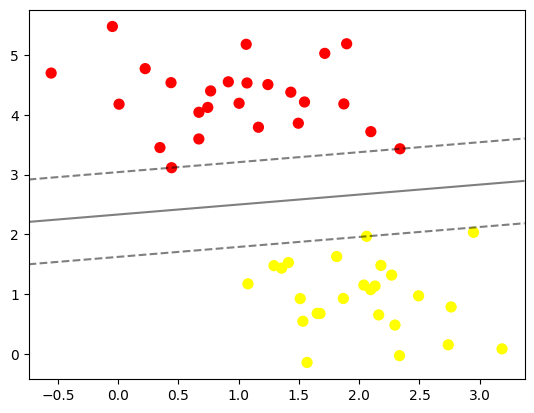

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

### 4. Data yang masuk di Support Vector

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### 5. Perbandingan data awal 60 VS 120

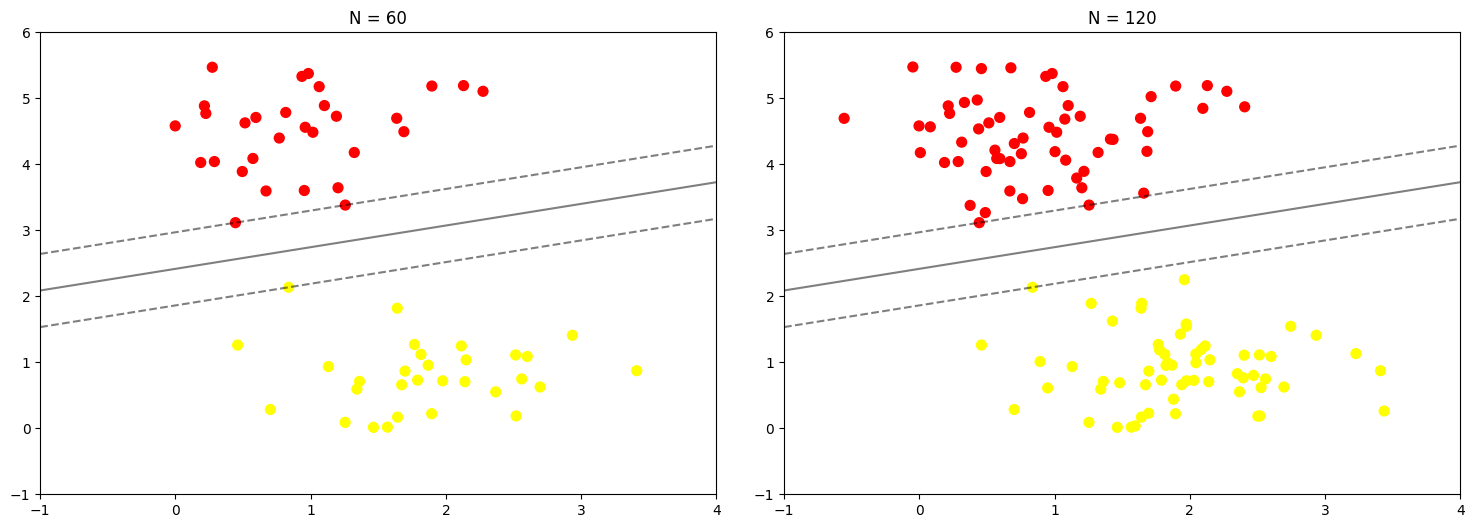

In [ ]:
def plot_svm(N=10, ax=None):
  # make_blobs untuk membuat data x dan y secara acak tapi membentuk cluster
  X, y = make_blobs(
      # menentukan jumlah total data
      n_samples=200,
      # membuat dataset 2 cluster
      centers=2,
      # agar tidak berubah tiap data dijalankan
      random_state=0,
      # untuk mengatur penyebaran data tiap cluster
      cluster_std=0.60
  )

  # mengambil N data pertama
  X = X[:N]
  # mengambil label sesuai jumlah data
  y = y[:N]
  # membuat SVM linear dengan regulasi besar
  model = SVC(kernel='linear', C=1E10)
  # melatih model dengan data
  model.fit(X, y)

  # menggunakan axes aktif jika tidak disediakan
  ax = ax or plt.gca()
  # menampilkan titik data dengan warna berbeda per kelas
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  # mengatur batas sumbu x
  ax.set_xlim(-1, 4)
  # mengatur batas sumbu y
  ax.set_ylim(-1, 6)
  # menampilkan garis batas keputusan dan margin SVM
  plot_svc_decision_function(model, ax)

# membuat 2 plot dalam satu baris
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# mengatur jarak antar subplot
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# melakukan perulangan untuk nilai N 60 dan 120
for axi, N in zip(ax, [60, 120]):
  # memanggil fungsi plot untuk tiap subplot
  plot_svm(N, axi)
  # memberikan judul sesuai jumlah data yang digunakan
  axi.set_title('N = {0}'.format(N))

### 6. Pemfilteran banyaknya data yang diinginkan

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
# mengimpor library untuk elemen interaktif
from ipywidgets import interact, fixed
# menentukan banyaknya N untuk pemfilteran
interact(plot_svm, N=[10, 50, 100, 150, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 150, 200), value=10), Output()), _dom_cl…

<function __main__.plot_svm(N=10, ax=None)>

# PRAKTIKUM 2

## Langkah 1 - Ilustrasi Data Non Linier

### Langkah 1a - Import Library

In [ ]:
# untuk operasi numerik
import numpy as np
# untuk visualisasi data
import matplotlib.pyplot as plt
# untuk grafik yang lebih menarik
import seaborn as sns
# untuk fungsi statistik
from scipy import stats
# untuk model Support Vector Classifier dari scikit learn
from sklearn.svm import SVC

### Langkah 1b - Membuat Kembali Fungsi Plotting

In [ ]:
# untuk menampilkan batas keputusan dan margin pada model SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()  # ambil axes aktif jika belum ada
    xlim = ax.get_xlim()  # batas sumbu x
    ylim = ax.get_ylim()  # batas sumbu y

    x = np.linspace(xlim[0], xlim[1], 30)  # buat grid titik x
    y = np.linspace(ylim[0], ylim[1], 30)  # buat grid titik y
    Y, X = np.meshgrid(y, x)  # buat meshgrid dari x dan y
    xy = np.vstack([X.ravel(), Y.ravel()]).T  # gabungkan koordinat jadi array 2 kolom
    P = model.decision_function(xy).reshape(X.shape)  # evaluasi fungsi keputusan

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])  # gambar boundary dan margin

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')  # tampilkan support vectors

    ax.set_xlim(xlim)  # kembalikan batas sumbu x
    ax.set_ylim(ylim)  # kembalikan batas sumbu y

### Langkah 1c - Membuat Data Dummy Non Linier

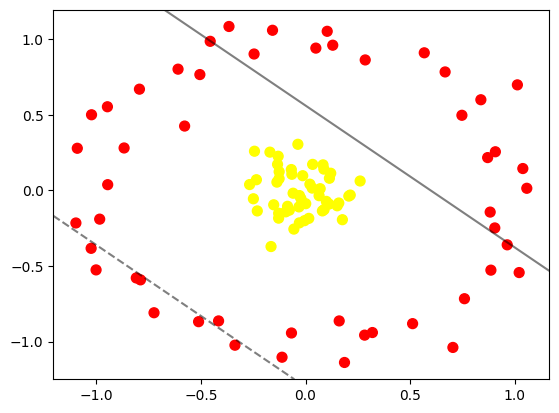

In [ ]:
# --- contoh data tidak terpisah secara linier ---
# untuk membuat data berbentuk lingkaran konsentris
from sklearn.datasets import make_circles
# buat 100 data dengan noise kecil dan faktor jarak antar lingkaran
X, y = make_circles(100, factor=.1, noise=.1)

# latih model SVM dengan kernel linear
clf = SVC(kernel='linear').fit(X, y)

# tampilkan data dengan warna sesuai label
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# tampilkan batas keputusan tanpa support vector
plot_svc_decision_function(clf, plot_support=False);

### Langkah 1d - Visualisasi diubah menjadi model 3D.

In [ ]:
from mpl_toolkits import mplot3d  # import modul untuk plot 3D
from ipywidgets import interact, fixed  # import widget interaktif di Jupyter

def plot_3D(elev=30, azim=30, X=X, y=y, r=None):
    if r is None:
        r = X[:, 0]**2 + X[:, 1]**2  # default jika r tidak diberikan
    ax = plt.subplot(projection='3d')  # buat subplot 3D
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')  # scatter plot 3D, warna sesuai label y
    ax.view_init(elev=elev, azim=azim)  # set elevasi dan azimuth untuk view 3D
    ax.set_xlabel('x')  # label sumbu x
    ax.set_ylabel('y')  # label sumbu y
    ax.set_zlabel('r')  # label sumbu z

interact(plot_3D,
         elev=[-90, 45, 30, 20, 10],  # pilihan elevasi
         azim=(-180, 180),            # slider azimuth
         X=fixed(X),                  # X fix supaya tidak berubah
         y=fixed(y),
         r=fixed(None))                  # y fix supaya tidak berubah

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.21649044e-02,  1.46568524e-02],
       [-1.02264667e+00,  4.99590912e-01],
       [-1.70003547e-01,  2.52428434e-01],
       [ 8.82524637e-01, -1.44003046e-01],
       [-2.49103700e-01, -5.58855964e-02],
       [-1.02454660e+00, -3.83651539e-01],
       [-4.89894006e-03, -2.00814249e-01],
       [-9.83630971e-01, -1.90666581e-01],
       [ 9.04593913e-01, -2.48839406e-01],
       [ 7.59655449e-01, -7.16793658e-01],
       [-3.64934507e-02,  3.04403849e-01],
       [-1.09065723e+00,  2.78019310e-01],
       [-2.89187424e-02, -3.47746975e-02],
       [ 1.76216762e-01, -1.94325717e-01],
       [ 2.85382720e-01,  8.62195523e-01],
       [-4.55462096e-01,  9.85340052e-01],
       [-2.67183537e-01,  3.79983752e-02],
       [ 7.47433620e-01,  4.96191842e-01],
       [-6.52668096e-02,  1.06141035e-01],
       [ 1.14230938e-01,  7.96928475e-02],
       [-2.45757148e-01,  9.01387103e-01],
       [ 3.19656946e-01, -9.40545385e-01],
       [-5.93193240e-02, -1.91657246e-02],
       [ 2.82539973e-01, -9.57714883e-01],
       [-3.65721950e-01,  1.08345804e+00],
       [ 8.87024382e-02, -1.27736721e-01],
       [ 1.51509776e-01, -1.02299317e-01],
       [ 4.94132463e-02,  9.40387969e-01],
       [ 2.13747038e-01, -3.14316698e-02],
       [ 2.09935364e-02,  4.05012961e-02],
       [ 9.96035264e-02, -7.32067847e-02],
       [ 1.01257921e+00,  6.97429610e-01],
       [-7.73656859e-02, -1.31148951e-01],
       [ 5.67553452e-01,  9.09391146e-01],
       [-1.12209285e-01, -1.10376157e+00],
       [-1.33529904e-02,  9.66111292e-02],
       [-1.09736510e+00, -2.16023697e-01],
       [-8.57775720e-02, -1.05800497e-01],
       [ 2.06991470e-01, -3.82637604e-02],
       [-8.66955227e-01,  2.79996346e-01],
       [-5.11019064e-01, -8.68708479e-01],
       [ 1.20550385e-01,  1.12937872e-01],
       [ 7.04390420e-01, -1.03907420e+00],
       [-8.08753531e-01, -5.79558253e-01],
       [ 8.70528846e-01,  2.16422481e-01],
       [-5.04888286e-01,  7.65454867e-01],
       [ 8.77385346e-02,  1.40207284e-01],
       [-4.15465314e-01, -8.63673377e-01],
       [-5.77732623e-01,  4.24943585e-01],
       [ 1.04675441e-03, -8.85030426e-02],
       [ 8.38059368e-01,  5.98911927e-01],
       [ 1.30137311e-01,  9.59643009e-01],
       [ 5.11809022e-01, -8.81718017e-01],
       [ 1.03858922e+00,  1.44020864e-01],
       [ 8.08058795e-02, -1.36168578e-01],
       [ 1.59061745e-01, -8.39690747e-02],
       [ 7.00406652e-02,  1.06727149e-02],
       [-1.28271586e-01, -1.51771751e-01],
       [ 8.85995001e-01, -5.27964121e-01],
       [-3.12403946e-02, -1.09663620e-01],
       [-1.57650056e-01,  1.05836120e+00],
       [-2.95377856e-02, -2.15438814e-01],
       [ 6.48941711e-02, -3.55319611e-02],
       [-1.64769308e-01, -3.71882475e-01],
       [ 8.37776949e-02,  1.68368928e-01],
       [-7.93644569e-01,  6.68849276e-01],
       [-7.23988491e-01, -8.09681225e-01],
       [-2.34702538e-01,  7.00490686e-02],
       [ 6.67213133e-01,  7.82837877e-01],
       [ 1.03690706e-01,  1.05154704e+00],
       [ 1.86323278e-01, -1.13853983e+00],
       [-3.37201853e-01, -1.02429317e+00],
       [-1.26184831e-01,  7.71070373e-02],
       [ 9.64024908e-01, -3.60481934e-01],
       [-1.30601578e-01,  2.25297432e-01],
       [ 1.02106347e+00, -5.43880766e-01],
       [ 2.61035272e-01,  6.15596577e-02],
       [ 1.60992620e-01, -8.63751830e-01],
       [-9.46699278e-01,  5.52572644e-01],
       [ 1.12507906e-01, -9.10842144e-02],
       [ 9.07367955e-01,  2.54900022e-01],
       [-9.45360926e-01,  3.73190536e-02],
       [-7.88764055e-01, -5.92139097e-01],
       [ 3.40759995e-02,  1.71492876e-01],
       [-2.30459293e-01, -1.36273312e-01],
       [ 1.05758837e+00,  1.34413482e-02],
       [-1.25954855e-01,  1.23053725e-01],
       [-9.45055380e-02, -1.42365422e-01],
       [ 1.56083608e-02, -1.85599145e-01],
       [-1.51987208e-01, -9.57773031e-02],
       [-6.77670270e-02,  1.37267706e-01],
       [-5.55972239e-02, -2.56448000e-01

## Langkah 2 - Fitting Model


Text(0.5, 1.0, 'Visualisasi decision boundaries (kernel RBF)')

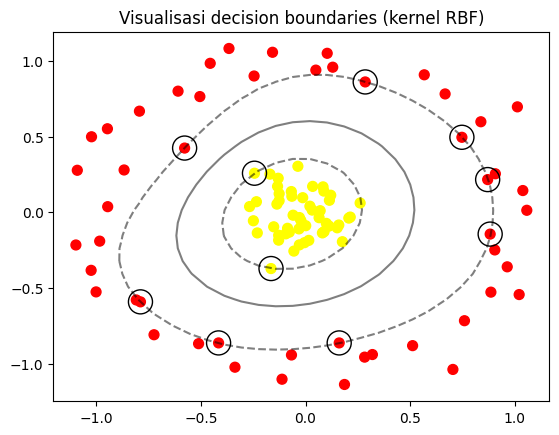

In [ ]:
clf = SVC(kernel='rbf', C=1E6)  # buat model SVM dengan kernel RBF dan penalti C sangat besar
clf.fit(X, y)  # latih model SVM dengan data X dan label y

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # plot titik data, warna sesuai label
plot_svc_decision_function(clf)  # tampilkan decision boundary dan margin SVM
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')  # highlight support vectors
plt.title("Visualisasi decision boundaries (kernel RBF)")  # beri judul plot

# PRAKTIKUM 3

## Langkah 1 - Import Library dan Buat Fungsi Plotting

### Langkah 1a - Import Library

In [ ]:
import numpy as np               # library untuk operasi numerik dan array multidimensi
import matplotlib.pyplot as plt  # library untuk visualisasi grafik 2D/plot
from scipy import stats           # modul untuk analisis statistik dan fungsi distribusi
import seaborn as sns             # library untuk visualisasi statistik yang lebih cantik dan mudah
from sklearn.svm import SVC       # modul Support Vector Classifier dari scikit-learn
from sklearn.datasets import make_blobs  # fungsi untuk membuat dataset sintetis berbentuk cluster/blobs

### Langkah 1b - Buat Fungsi Plotting

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # jika ax (axes) tidak diberikan, ambil axes aktif dari matplotlib
    if ax is None:
        ax = plt.gca()

    # simpan batas sumbu x dan y saat ini
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid titik untuk evaluasi fungsi keputusan model
    x = np.linspace(xlim[0], xlim[1], 30)  # 30 titik sepanjang x
    y = np.linspace(ylim[0], ylim[1], 30)  # 30 titik sepanjang y
    Y, X = np.meshgrid(y, x)               # buat meshgrid untuk kombinasi x dan y
    xy = np.vstack([X.ravel(), Y.ravel()]).T  # gabungkan menjadi array 2 kolom (x, y)
    P = model.decision_function(xy).reshape(X.shape)  # evaluasi fungsi keputusan SVM

    # plot contour untuk decision boundary dan margin
    # level=0 -> hyperplane, level=-1 & 1 -> margin, warna hitam
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # jika plot_support=True, tampilkan support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')  # support vector diberi lingkaran kosong

    # kembalikan batas sumbu seperti semula
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 2 - Buat Data Dummy

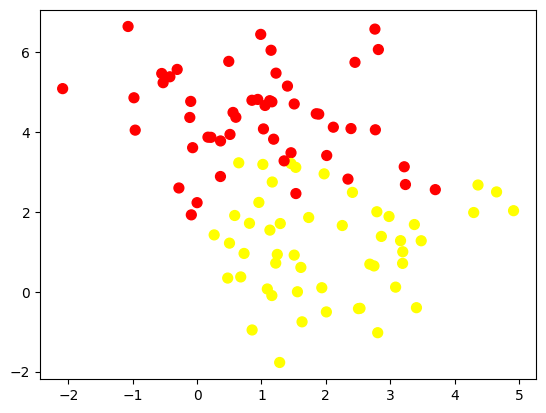

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,      # buat dataset sintetis 2D dengan 100 titik dan 2 cluster
                  random_state=0, cluster_std=1.2)  # random_state agar hasil konsisten, cluster_std = sebaran titik

# plot titik-titik data X, warna sesuai label y, ukuran titik=50, colormap 'autumn'
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Analisis Dampak Tunning

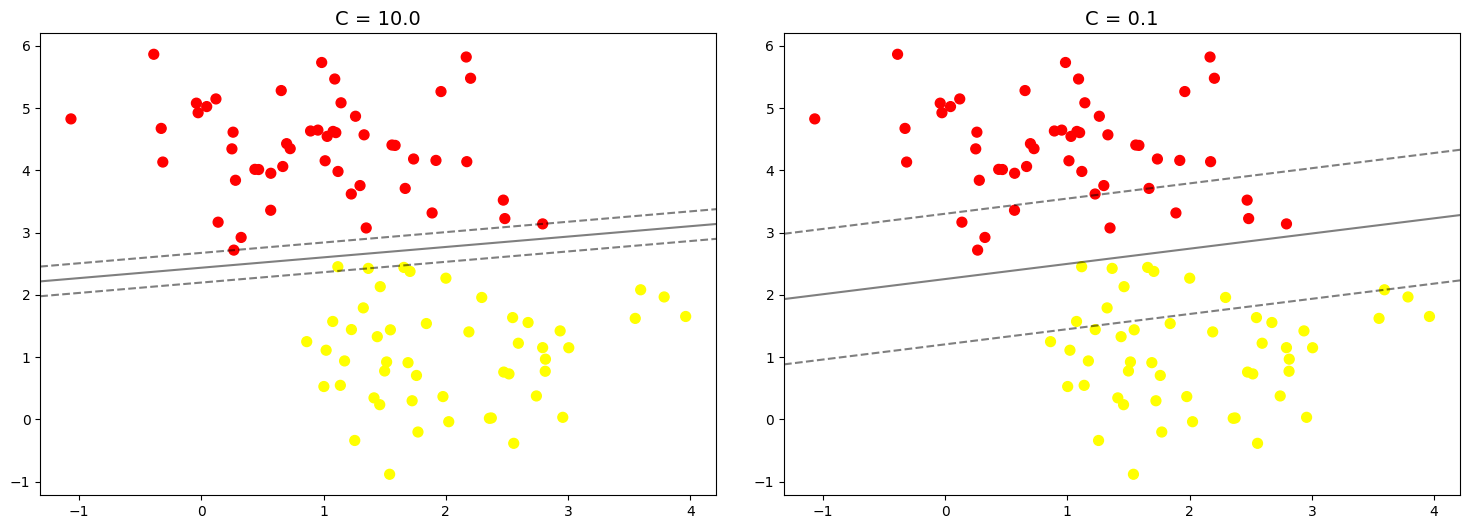

In [ ]:
# buat dataset sintetis 2D dengan 100 titik, 2 cluster, sebaran cluster std=0.8, hasil konsisten dengan random_state=0
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.8, random_state=0)

# buat figure dengan 1 baris dan 2 kolom subplot, ukuran total figure 16x6 inch
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# atur margin kiri/kanan dan jarak antar subplot (wspace)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# loop melalui setiap subplot dan nilai parameter C SVM (besar dan kecil)
for axi, C in zip(ax, [10.0, 0.1]):

    # buat dan latih SVM linear dengan parameter C tertentu
    model = SVC(kernel='linear', C=C).fit(X, y)

    # plot data pada subplot saat ini, warna sesuai label y
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    # plot decision boundary dan margin SVM pada subplot saat ini
    plot_svc_decision_function(model, axi)

    # tampilkan support vectors sebagai lingkaran kosong
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')

    # beri judul subplot dengan nilai C, font size 14
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# PRAKTIKUM 4

## Langkah 0 - Unduh Dataset

In [ ]:
# import fungsi untuk mengambil dataset "Labeled Faces in the Wild" (gambar wajah)
from sklearn.datasets import fetch_lfw_people

# ambil dataset wajah, hanya orang yang memiliki minimal 60 foto
faces = fetch_lfw_people(min_faces_per_person=60)

# tampilkan nama-nama orang dalam dataset
print(faces.target_names)

# tampilkan jumlah orang unik dalam dataset
print(len(faces.target_names))

# tampilkan bentuk array gambar: (jumlah gambar, tinggi, lebar)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Langkah 1 - Inspeksi Citra Wajah

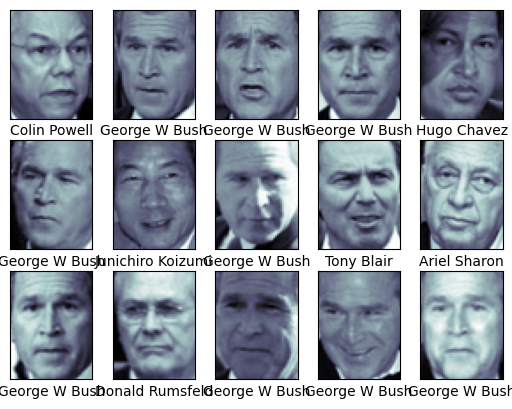

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt  # import modul plotting

fig, ax = plt.subplots(3, 5)  # buat figure dengan 3 baris dan 5 kolom subplot

for i, axi in enumerate(ax.flat):  # loop melalui setiap subplot
    axi.imshow(faces.images[i], cmap='bone')  # tampilkan gambar wajah ke-i dengan colormap 'bone'
    axi.set(xticks=[], yticks=[],  # hilangkan tick sumbu x dan y
            xlabel=faces.target_names[faces.target[i]])  # beri label nama orang sesuai target

## Langkah 2 - Pra Pengolahan Data

In [ ]:
# import Support Vector Classifier dari scikit-learn
from sklearn.svm import SVC

# import PCA (Principal Component Analysis) untuk reduksi dimensi
from sklearn.decomposition import PCA as RandomizedPCA

# import pipeline untuk menggabungkan beberapa step menjadi satu model
from sklearn.pipeline import make_pipeline

# buat objek PCA untuk mereduksi fitur menjadi 150 komponen, dengan whitening untuk normalisasi, hasil konsisten
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# buat objek SVM dengan kernel RBF, dan class_weight='balanced' untuk menangani ketidakseimbangan kelas
svc = SVC(kernel='rbf', class_weight='balanced')

# pipeline digunakan untuk menjalankan PCA dan SVM secara bertahap dalam satu eksekusi
model = make_pipeline(pca, svc)

## Langkah 3 - Split Data

In [ ]:
# import fungsi untuk memisahkan dataset menjadi data training dan testing
from sklearn.model_selection import train_test_split

# pisahkan data menjadi training dan testing
# faces.data = fitur flatten dari gambar, faces.target = label
# Xtrain, Xtest = fitur training dan testing
# ytrain, ytest = label training dan testing
# random_state=42 agar hasil split konsisten
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Langkah 4 - Pembuatan Model + Tunning

In [ ]:
# import GridSearchCV untuk mencari kombinasi hyperparameter terbaik secara otomatis
from sklearn.model_selection import GridSearchCV

# buat grid hyperparameter untuk SVM di pipeline
# 'svc__C' dan 'svc__gamma' menyesuaikan parameter SVM di pipeline (svc adalah nama step di pipeline)
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# buat objek GridSearchCV dengan pipeline model dan grid parameter
grid = GridSearchCV(model, param_grid)

# ukur waktu eksekusi saat fitting model GridSearchCV
%time grid.fit(Xtrain, ytrain)

# tampilkan kombinasi parameter terbaik dari hasil GridSearchCV
print(grid.best_params_)

# tampilkan score terbaik (akurasi) dari kombinasi parameter tersebut
print(grid.best_score_)

CPU times: user 2min 15s, sys: 225 ms, total: 2min 16s
Wall time: 1min 50s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


 model terbaik tersebut untuk proses prediksi

In [ ]:
# ambil model terbaik hasil GridSearchCV (pipeline dengan hyperparameter optimal)
model = grid.best_estimator_

# prediksi label data testing menggunakan model terbaik
yfit = model.predict(Xtest)

## Langkah 5 - Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

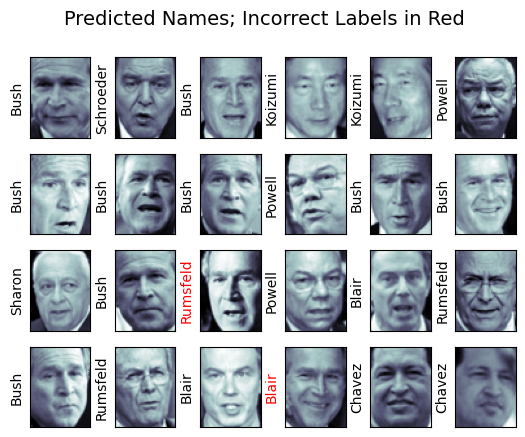

In [ ]:
# buat figure dengan 4 baris dan 6 kolom subplot untuk menampilkan prediksi wajah
fig, ax = plt.subplots(4, 6)

# loop melalui setiap subplot
for i, axi in enumerate(ax.flat):
    # tampilkan gambar wajah dari data testing, reshape dari 1D menjadi 62x47
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')

    # hilangkan tick pada sumbu x dan y
    axi.set(xticks=[], yticks=[])

    # beri label dengan nama prediksi; jika prediksi salah, warna merah, jika benar, hitam
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

# beri judul keseluruhan figure
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Langkah 6 - Cek Performansi

### Langkah 6a - cek performansi dengan "classification_report" dari sklearn

In [ ]:
# import fungsi untuk membuat laporan klasifikasi
from sklearn.metrics import classification_report

# tampilkan laporan klasifikasi untuk data testing
# ytest = label asli, yfit = label prediksi
# target_names = nama kelas/individu sesuai dataset faces
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



### Langkah 6b - penggunaan confusion matrix

Text(113.92222222222219, 0.5, 'predicted label')

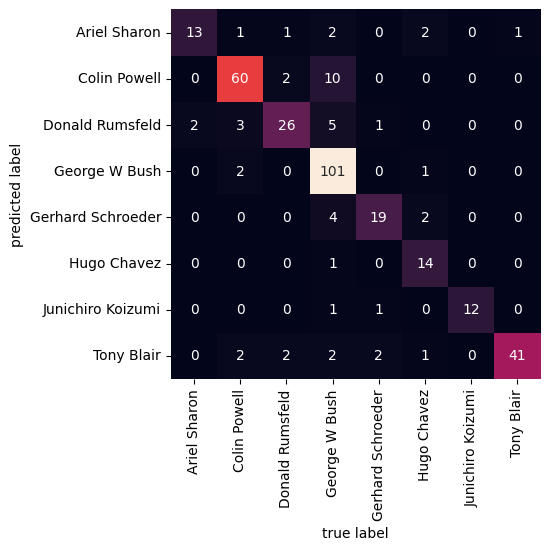

In [ ]:
# import fungsi untuk membuat confusion matrix
from sklearn.metrics import confusion_matrix

# import seaborn untuk visualisasi heatmap
import seaborn as sns

# buat confusion matrix antara label asli dan prediksi
mat = confusion_matrix(ytest, yfit)

# tampilkan confusion matrix dalam bentuk heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,  # label sumbu x = nama kelas asli
            yticklabels=faces.target_names)  # label sumbu y = nama kelas prediksi

# beri label sumbu x dan y
plt.xlabel('true label')
plt.ylabel('predicted label')

# PRAKTIKUM 5

## Langkah 1 - Import Library

In [ ]:
# import modul untuk manipulasi path file
from pathlib import Path

# import modul untuk membaca gambar
import matplotlib.image as mpimg

# import modul plotting
import matplotlib.pyplot as plt

# import OpenCV untuk pemrosesan citra
import cv2

# import modul untuk operasi acak
import random

# import modul untuk operasi numerik (array, matriks)
import numpy as np

# import modul untuk manipulasi data tabel (DataFrame)
import pandas as pd

In [ ]:
# import modul untuk mount Google Drive
from google.colab import drive
# mount Google Drive
drive.mount('/content/drive')

# direktori folder untuk data training
train_dir = "/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/images/training/"

# direktori folder untuk data testing
test_dir = "/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/images/test/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Langkah 2 - Load Data dan Visualisasikan

### Langkah 2a - Fungsi untuk membuat daftar seluruh path dari gambar

In [ ]:
# fungsi untuk memuat dataset dari folder gambar
def load_dataset(img_dir):
    # buat objek Path dari direktori
    p = Path(img_dir)

    # dapatkan daftar subfolder (setiap subfolder = label/class)
    dirs = p.glob('*')

    # list untuk menyimpan pasangan (gambar, label)
    img_list = []

    # loop setiap subfolder (kelas)
    for dir in dirs:
        # ambil nama folder sebagai label
        label = str(dir).split('/')[-1]

        # loop setiap file JPG dalam folder
        for file in dir.glob('*.jpg'):
            # baca gambar
            img = mpimg.imread(file)

            # jika gambar berhasil dibaca, tambahkan ke list beserta label
            if img is not None:
                img_list.append((img, label))

    # kembalikan list gambar beserta label
    return img_list

### Langkah 2b - Load gambar training

In [ ]:
# panggil fungsi load_dataset untuk memuat semua gambar dari folder training
train_img = load_dataset(train_dir)

### Langkah 2c - Pengecekan pada salah satu data pada list

In [ ]:
# akses elemen pertama dari list train_img
# elemen ini berupa tuple: (image_array, label)
train_img[0]

(array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]]], dtype=uint8),
 'night')

### Langkah 2d - Cek ukuran gambar secara acak

In [ ]:
# pilih indeks gambar secara acak dari dataset training
pick_random = np.random.randint(0, len(train_img))

# tampilkan indeks gambar yang dipilih
print(f'Image {pick_random}')

# tampilkan ukuran (shape) array gambar yang dipilih
# bentuk array biasanya (tinggi, lebar, channel) untuk gambar RGB
print(train_img[pick_random][0].shape)

Image 141
(458, 800, 3)


### Langkah 2e - Buat fungsi untuk membantu memvisualkan gambar




In [ ]:
# fungsi untuk menampilkan gambar acak dari list gambar
def random_img_viz(img_list):
    # pilih indeks acak
    rand_num = np.random.randint(0, len(img_list))

    # ambil gambar dan label dari indeks acak
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]

    # buat string label untuk visualisasi (opsional)
    label_str = 'day' if label == 1 else 'night'

    # tampilkan gambar
    plt.imshow(img)

    # tampilkan info shape dan label
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

### Langkah 2f - Lakukan visualisasi gambar secara acak




Shape	: (593, 800, 3)
Label	: day


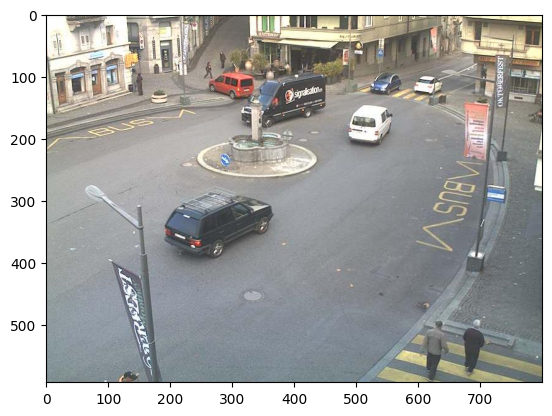

In [ ]:
# panggil fungsi random_img_viz untuk menampilkan satu gambar acak dari dataset training
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

### Langkah 3a - Buat fungsi untuk menstandarkan ukuran gambar

In [ ]:
# fungsi untuk melakukan standarisasi ukuran gambar
def standarized_input(image):
    # ubah ukuran gambar menjadi width=1100, height=600
    std_img = cv2.resize(image, (1100, 600))

    # kembalikan gambar yang sudah diubah ukurannya
    return std_img

### Langkah 3b - Buat fungsi untuk kebutuhan encoding label

In [ ]:
# fungsi untuk mengubah label string menjadi angka
def label_encoder(label):
    # inisialisasi nilai numerik default
    num_val = 0

    # jika label 'day', beri nilai 1
    if label == 'day':
        num_val = 1

    # kembalikan nilai numerik label
    return num_val

### Langkah 3c - Buat fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list

In [ ]:
# fungsi untuk preprocessing seluruh dataset gambar
def preprocess(img_list):
    # list untuk menyimpan gambar dan label yang sudah diproses
    std_img_list = []

    # loop setiap elemen di img_list
    for item in img_list:
        # ambil gambar dan label
        image = item[0]
        label = item[1]

        # lakukan standarisasi ukuran gambar
        std_img = standarized_input(image)

        # encode label menjadi angka
        img_label = label_encoder(label)

        # tambahkan tuple (gambar, label) yang sudah diproses ke list
        std_img_list.append((std_img, img_label))

    # kembalikan list dataset yang sudah diproses
    return std_img_list

### Langkah 3d - Lakukan pra pengolahan data pada data training

In [ ]:
# panggil fungsi preprocess untuk melakukan standarisasi dan encoding label pada dataset training
train_std_img_list = preprocess(train_img)

### Langkah 3e - Lakukan pengecekan ukuran gambar secara acak

In [ ]:
# pilih indeks gambar secara acak dari dataset training yang sudah diproses
pick_random = np.random.randint(0, len(train_std_img_list))

# tampilkan indeks gambar yang dipilih
print(f'Image {pick_random}')

# tampilkan ukuran (shape) array gambar yang sudah distandarisasi
print(train_std_img_list[pick_random][0].shape)

Image 218
(600, 1100, 3)


### Langkah 3f - Lakukan inspeksi visual dengan fungsi random_img_viz

Shape	: (600, 1100, 3)
Label	: 1


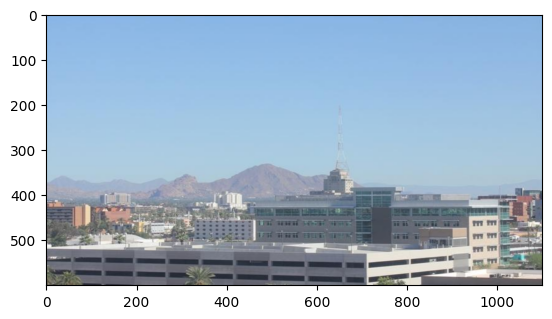

In [ ]:
random_img_viz(train_std_img_list)

## **Menggunakan Classifier Sederhana**

## Langkah 4 - Ekstraksi Fitur

### Langkah 4a - Buat fungsi untuk mendapatkan nilai rata-rata tingkat kecerahan

In [ ]:
# fungsi untuk menghitung fitur rata-rata kecerahan dari gambar menggunakan HSV colorspace
def avg_brightness(image):
    # konversi gambar dari RGB ke HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # ambil channel V (Value) yang merepresentasikan kecerahan
    sum_brightness = np.sum(img_hsv[:, :, 2])  # total brightness seluruh piksel

    # hitung luas gambar (height * width)
    area = image.shape[0] * image.shape[1]

    # rata-rata kecerahan = total brightness / jumlah piksel
    avg = sum_brightness / area

    # kembalikan nilai rata-rata kecerahan
    return avg

### Langkah 4b -Lakukan pengecekan pada gambar secara acak

Image 46
Avg Brightness: 8.1919


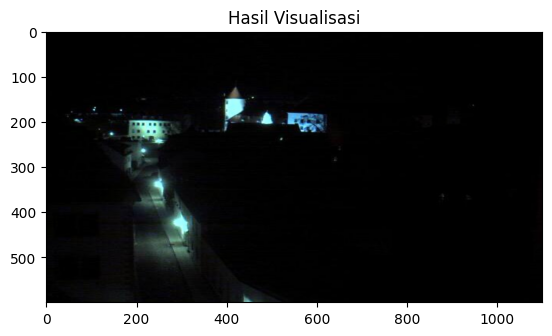

In [ ]:
# pilih indeks gambar secara acak dari dataset training
rand_img = np.random.randint(0, len(train_std_img_list))

# ambil gambar yang dipilih secara acak
feature_img = train_std_img_list[rand_img][0]

# hitung rata-rata kecerahan gambar menggunakan fungsi avg_brightness
avg_img = avg_brightness(feature_img)

# tampilkan informasi gambar
print(f'Image {rand_img}')
print(f'Avg Brightness: {avg_img:.4f}')

# tampilkan gambar secara visual
plt.title("Hasil Visualisasi")
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

### Langkah 5a - Buat fungsi berikut

In [ ]:
# fungsi untuk memprediksi label gambar berdasarkan rata-rata kecerahan
def predict_label(img, threshold):
    # hitung rata-rata kecerahan gambar
    avg = avg_brightness(img)

    # inisialisasi prediksi default = 0 ('night')
    pred = 0

    # jika rata-rata kecerahan melebihi threshold, prediksi 'day' (1)
    if avg > threshold:
        pred = 1

    # kembalikan prediksi label
    return pred

### Langkah 5b - Lakukan pengecekan prediksi secara acak pada data training

Image 152
Actual label: 1
Predicted label: 1


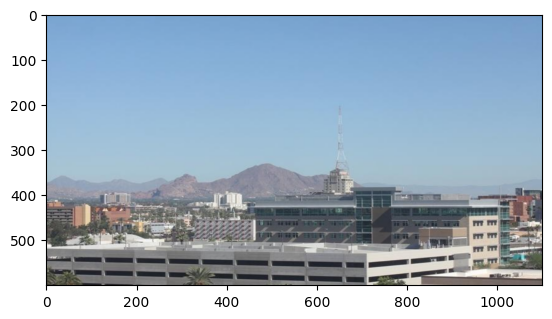

In [ ]:
# pilih indeks gambar secara acak dari dataset training
rand_img = np.random.randint(0, len(train_std_img_list))

# prediksi label gambar menggunakan fungsi predict_label dengan threshold 120
pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# tampilkan informasi gambar dan evaluasi prediksi
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')  # label asli
print(f'Predicted label: {pred}')  # label prediksi

# tampilkan gambar secara visual
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual

### Langkah 6a - Buat fungsi berikut

In [ ]:
# fungsi untuk mengevaluasi classifier berbasis brightness pada dataset
def evaluate(img_list, threshold):
    # list untuk menyimpan gambar yang prediksinya salah
    miss_labels = []

    # loop setiap gambar dalam dataset
    for file in img_list:
        # ambil gambar dan label asli
        img = file[0]
        label = file[1]

        # prediksi label gambar
        pred_label = predict_label(img, threshold)

        # jika prediksi salah, simpan ke miss_labels
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    # total jumlah gambar
    total_img = len(img_list)

    # jumlah prediksi benar
    corr_pred = total_img - len(miss_labels)

    # hitung akurasi
    accuracy = corr_pred / total_img

    # tampilkan akurasi
    print(f'Accuracy: {accuracy:.4f}')

### Langkah 6b - Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [ ]:
# evaluasi classifier berbasis brightness pada dataset training dengan threshold 120
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


### Langkah 6c - Lakukan evaluasi pada data testing

In [ ]:
# Evaluasi classifier berbasis brightness pada data testing

# muat dataset test dari folder test_dir
test_img = load_dataset(test_dir)

# lakukan preprocessing: resize dan encode label
test_std_img_list = preprocess(test_img)

# evaluasi classifier pada dataset test dengan threshold 120
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## **Menggunakan Klasifikasi dengan SVM**

## Langkah 4 Alternatif - Membuat Feature Vectors

### Langkah 4a - Buat fungsi berikut

In [ ]:
# fungsi untuk mengekstrak fitur rata-rata kecerahan dari setiap gambar
# hasil disimpan dalam bentuk tabel (Pandas DataFrame)
def extract_avg_bright_feature(img_list):
    # list untuk menyimpan nilai brightness
    avg_list = []
    # list untuk menyimpan label gambar
    labels = []

    # loop setiap gambar dalam list
    for img in img_list:
        # hitung rata-rata kecerahan gambar
        img_avg = avg_brightness(img[0])
        # ambil label gambar
        img_label = img[1]

        # simpan hasil ke list
        avg_list.append(img_avg)
        labels.append(img_label)

    # gabungkan list menjadi array 2 kolom (feature + label)
    data = np.column_stack((avg_list, labels))

    # buat Pandas DataFrame dengan nama kolom
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    # kembalikan DataFrame
    return df

### Langkah 4b - Cek hasilnya pada data training

In [ ]:
# ekstrak fitur rata-rata brightness pada dataset training
train_avg_img = extract_avg_bright_feature(train_std_img_list)

# tampilkan ukuran DataFrame (jumlah baris dan kolom)
print(f'Shape: {train_avg_img.shape}')

# tampilkan 5 baris pertama DataFrame
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,13.786888,0.0
1,99.623588,0.0
2,109.774736,0.0
3,119.603174,0.0
4,108.988659,0.0


### Langkah 4c - Cek hasilnya pada data testing

In [ ]:
# ekstrak fitur rata-rata brightness pada dataset testing
test_avg_img = extract_avg_bright_feature(test_std_img_list)

# tampilkan ukuran DataFrame (jumlah baris dan kolom)
print(f'Shape: {test_avg_img.shape}')

# tampilkan 5 baris pertama DataFrame untuk inspeksi
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,18.619045,0.0
1,14.008245,0.0
2,175.582911,0.0
3,21.454098,0.0
4,89.160545,0.0


## Langkah 5 - Buat Model SVM

In [ ]:
# import library SVM dari scikit-learn
from sklearn.svm import SVC

# pisahkan fitur dan label untuk training dan testing
X_train = train_avg_img.iloc[:, 0].values.reshape(-1, 1)  # kolom AVG_BRIGHT sebagai feature
y_train = train_avg_img.iloc[:, 1]                        # kolom LABELS sebagai label
X_test = test_avg_img.iloc[:, 0].values.reshape(-1, 1)    # kolom AVG_BRIGHT sebagai feature
y_test = test_avg_img.iloc[:, 1]                          # kolom LABELS sebagai label

# buat model SVM
model = SVC()

# latih model menggunakan data training
model.fit(X_train, y_train)

SVC()

## Langkah 6 - Evaluasi

In [ ]:
# import fungsi untuk menghitung akurasi
from sklearn.metrics import accuracy_score

# prediksi label pada data training
y_train_pred = model.predict(X_train)

# hitung akurasi pada data training
acc_train = accuracy_score(y_train, y_train_pred)

# prediksi label pada data testing
y_test_pred = model.predict(X_test)

# hitung akurasi pada data testing
acc_test = accuracy_score(y_test, y_test_pred)

# tampilkan hasil evaluasi
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# TUGAS PRAKTIKUM

## 1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

### a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
*  Gunakan model dengan kernel linier.
*  Gunakan model dengan kernel polynomial.
*  Gunakan model dengan kernel RBF.
### b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

### Langkah 1 - Import Library

In [ ]:
# import library pandas untuk manipulasi data
import pandas as pd

# import fungsi untuk membagi dataset menjadi training dan testing
from sklearn.model_selection import train_test_split

# import Support Vector Classifier
from sklearn.svm import SVC

# import fungsi untuk menghitung akurasi model
from sklearn.metrics import accuracy_score

### Langkah 2 -  Load Dataset

In [ ]:
# membaca dataset voice.csv dari Google Drive
data = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/voice.csv')

# pisahkan fitur: semua kolom kecuali 'label'
X = data.drop('label', axis=1)

# pisahkan target/label: kolom 'label'
y = data['label']

### Langkah 3 - Definisikan Split Dataset

In [ ]:
# membagi dataset menjadi training dan testing dengan rasio 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# membagi dataset menjadi training dan testing dengan rasio 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Langkah 4 - Buat Fungsi untuk Latih dan Evaluasi Model

In [ ]:
# fungsi untuk melatih dan mengevaluasi SVM
def train_evaluate_svm(X_train, X_test, y_train, y_test, kernel):
    # buat model SVM dengan kernel yang ditentukan
    model = SVC(kernel=kernel)

    # latih model dengan data training
    model.fit(X_train, y_train)

    # prediksi label pada data testing
    y_pred = model.predict(X_test)

    # hitung akurasi prediksi
    acc = accuracy_score(y_test, y_pred)

    # kembalikan nilai akurasi
    return acc

### Langkah 5 - Bangun Model SVM dengan Kernel Berbeda

Kernel Linear

In [ ]:
# latih dan evaluasi SVM dengan kernel linear untuk split 70:30
acc_linear_70 = train_evaluate_svm(
    X_train_70, X_test_30, y_train_70, y_test_30, kernel='linear'
)

# latih dan evaluasi SVM dengan kernel linear untuk split 80:20
acc_linear_80 = train_evaluate_svm(
    X_train_80, X_test_20, y_train_80, y_test_20, kernel='linear'
)

Kernel Polynomial

In [ ]:
# latih dan evaluasi SVM dengan kernel polynomial untuk split 70:30
acc_poly_70 = train_evaluate_svm(
    X_train_70, X_test_30, y_train_70, y_test_30, kernel='poly'
)

# latih dan evaluasi SVM dengan kernel polynomial untuk split 80:20
acc_poly_80 = train_evaluate_svm(
    X_train_80, X_test_20, y_train_80, y_test_20, kernel='poly'
)

Kernel RBF

In [ ]:
# latih dan evaluasi SVM dengan kernel RBF untuk split 70:30
acc_rbf_70 = train_evaluate_svm(
    X_train_70, X_test_30, y_train_70, y_test_30, kernel='rbf'
)

# latih dan evaluasi SVM dengan kernel RBF untuk split 80:20
acc_rbf_80 = train_evaluate_svm(
    X_train_80, X_test_20, y_train_80, y_test_20, kernel='rbf'
)

### Langkah 6 - Tabulasikan Hasil

In [ ]:
# membuat tabel hasil evaluasi akurasi SVM dengan berbagai kernel dan split
results = pd.DataFrame({
    'Kernel': ['Linear', 'Polynomial', 'RBF'],  # nama kernel
    '70:30 Split': [acc_linear_70, acc_poly_70, acc_rbf_70],  # akurasi split 70:30
    '80:20 Split': [acc_linear_80, acc_poly_80, acc_rbf_80]   # akurasi split 80:20
})

# tampilkan tabel hasil evaluasi
print(results)

       Kernel  70:30 Split  80:20 Split
0      Linear     0.926393     0.941640
1  Polynomial     0.490011     0.482650
2         RBF     0.662461     0.656151


### Ringkasan Nomor 1 :
Berdasarkan tabel, SVM dengan kernel linear menunjukkan performa terbaik dengan akurasi tertinggi pada kedua rasio split. Kernel RBF memiliki akurasi sedang, sedangkan polynomial paling rendah dan kurang efektif untuk dataset ini. Dengan demikian, kernel linear direkomendasikan untuk klasifikasi voice dataset.

## 2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

### Langkah 1 - Import Library

In [ ]:
# import library untuk operasi numerik
import numpy as np

# import library untuk manipulasi data
import pandas as pd

# import OpenCV untuk manipulasi citra/gambar
import cv2

# import Support Vector Classifier
from sklearn.svm import SVC

# import fungsi untuk membagi dataset dan melakukan Grid Search
from sklearn.model_selection import train_test_split, GridSearchCV

# import fungsi untuk menghitung akurasi model
from sklearn.metrics import accuracy_score

### Langkah 2 - Ekstraksi Fitur Histogram Brightness

In [ ]:
# fungsi untuk mengekstraksi fitur histogram brightness dari list gambar
def extract_hist_feature(img_list, bins=16):
    hist_features = []  # menampung histogram tiap gambar
    labels = []         # menampung label gambar

    for img, label in img_list:
        # konversi gambar ke HSV (Hue, Saturation, Value)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        # ambil channel V (brightness)
        v_channel = img_hsv[:, :, 2]
        # hitung histogram brightness
        hist = cv2.calcHist([v_channel], [0], None, [bins], [0, 256])
        # normalisasi histogram
        hist = cv2.normalize(hist, hist).flatten()

        hist_features.append(hist)
        labels.append(label)

    # gabungkan histogram menjadi DataFrame Pandas
    df = pd.DataFrame(hist_features)
    # tambahkan kolom label
    df['LABEL'] = labels
    return df

# ekstrak fitur brightness dari seluruh dataset (train + test)
df_features = extract_hist_feature(train_std_img_list + test_std_img_list)

### Langkah 3 - Pisahkan Fitur dan Label

In [ ]:
# pisahkan fitur histogram dari label
X = df_features.drop('LABEL', axis=1).values  # semua kolom kecuali 'LABEL'

# pisahkan label
y = df_features['LABEL'].values  # kolom target 'LABEL'

### Langkah 4 - Split Dataset 80:20

In [ ]:
# membagi dataset menjadi training dan testing dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Langkah 5 - Hyperparameter Tuning RBF SVM

In [ ]:
# mendefinisikan grid hyperparameter untuk SVM RBF
param_grid = {
    'C': [0.1, 1, 10, 50, 100],        # regularisasi
    'gamma': [0.001, 0.01, 0.1, 1]     # pengaruh jarak titik data
}

# buat GridSearchCV untuk mencari kombinasi C dan gamma terbaik dengan 5-fold cross-validation
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

# latih model menggunakan data training
grid.fit(X_train, y_train)

# tampilkan parameter terbaik
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 50, 'gamma': 1}


### Langkah 6 - Evaluasi Model

In [ ]:
# ambil model terbaik dari GridSearchCV
model = grid.best_estimator_

# prediksi label pada data training
y_train_pred = model.predict(X_train)
# prediksi label pada data testing
y_test_pred = model.predict(X_test)

# hitung akurasi prediksi pada data training
acc_train = accuracy_score(y_train, y_train_pred)
# hitung akurasi prediksi pada data testing
acc_test = accuracy_score(y_test, y_test_pred)

# tampilkan hasil akurasi
print(f"Training Accuracy: {acc_train:.4f}")
print(f"Testing Accuracy: {acc_test:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9875


### Ringkasan Nomor 2 :
Model SVM dengan kernel RBF berhasil mengklasifikasikan data siang dan malam dengan sangat baik, ditunjukkan oleh akurasi 100% pada data training. Akurasi testing sebesar 98,75% menunjukkan model mampu generalisasi dengan baik pada data baru.